Exercise 2-4
Abhigyan Misra
Date  : 09/16/2020

In [20]:
from __future__ import print_function, division
import numpy as np

import nsfg
import first

In [21]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [22]:
# Filtering First Baby and All Other Babies
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Calculating mean values for each group
meanfirsts = firsts.totalwgt_lb.mean()
meanother = others.totalwgt_lb.mean()

# Calculcating Total Mean and Stndard Deviation for reference
totalsd = live.totalwgt_lb.std()
totalmean = live.totalwgt_lb.mean()

print("Mean Firsts:", meanfirsts)
print("Mean Other:", meanother)
print("%age Diff:", (100*(meanfirsts-meanother)/totalmean))

# Calculating Cohen's D Value - d
diff = meanfirsts - meanother
var1 = firsts.totalwgt_lb.var()
var2 = others.totalwgt_lb.var()
n1, n2 = len(firsts), len(others)
pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
d = diff / np.sqrt(pooled_var)

print("Cohens D:",d," Times(SD in lbs): ",totalsd)


Mean Firsts: 7.201094430437772
Mean Other: 7.325855614973262
%age Diff: -1.7171423678372415
Cohens D: -0.088672927072602  Times(SD in lbs):  1.4082934455690168


Means for First Babies are lesser than others. approx 1.7%
Based on Conhen's D Value, since the value is -0.089 approx, using which we can somewhat say first babies are slightly lighter.
Compared to preglength example, this Cohen's D Value is 3 times approx. However still the values has very minimal difference. If going by Rule of Thumb any value less around +/- 0.2, are considered very small difference.

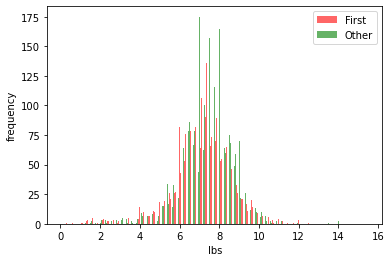

<Figure size 576x432 with 0 Axes>

In [40]:
# Plotting and Checking with Histogram too, to see if there is shift of population
import thinkstats2
import thinkplot

first_hist = thinkstats2.Hist(firsts.totalwgt_lb)
other_hist = thinkstats2.Hist(others.totalwgt_lb)
width = 0.02
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist,align = 'right', width=width, color = 'RED', label = 'First')
thinkplot.Hist(other_hist,align = 'left', width=width, color = 'GREEN', label = 'Other')
thinkplot.Show(xlabel='lbs', ylabel = 'frequency')

Histogram cannot confirm whether the first babies are lighter.